# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

# Import Dataset

In [2]:
df = pd.read_csv('../Dataset/songs_normalize_preprocessed.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,duration_ms,popularity,speechiness,key,energy,instrumentalness,valence,year,liveness,loudness,tempo,danceability,acousticness
0,0.264478,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.037084,0.307363,0.000018,0.401082,0.915499,0.232272
1,0.370598,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,0.010492,0.177238,0.000000,0.276007,0.256605,0.509441
2,0.300402,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.042330,0.026928,0.000014,0.391461,0.541127,0.397615
3,0.235918,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.051375,0.041784,0.001056,0.075767,0.899454,0.746771
4,0.379185,0.045455,0.775281,0.682033,0.882428,0.181818,0.669780,0.076339,0.121909,0.000098,0.058328,0.722965,0.407937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,0.183286,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.064399,0.043731,0.000000,0.101624,0.977538,0.516727
1743,0.176281,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,0.242041,0.119860,0.000021,0.100421,0.562520,0.729122
1744,0.236007,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,0.155210,0.068527,0.000000,0.303668,0.826719,0.251704
1745,0.156351,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,0.076700,0.461055,0.000002,0.241130,0.330410,0.284946


# Withoout PCA

## Implement KMeans

In [3]:
kmeansInertias = []
for k in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0, n_init=12) 
    kmeans.fit(df)
    clusterCenters = kmeans.cluster_centers_
    kmeansInertias.append(kmeans.inertia_)
    centroidsTable = pd.DataFrame(clusterCenters, columns=df.columns[:17], index = ['C'+str(i+1) for i in range(len(clusterCenters))])
    
    display(centroidsTable)

,duration_ms,popularity,speechiness,key,energy,instrumentalness,valence,year,liveness,loudness,tempo,danceability,acousticness
C1,0.306117,0.523318,0.677560,0.652797,0.718962,0.770211,0.750201,0.139008,0.110172,0.009003,0.170802,0.571965,0.393652
C2,0.310777,0.519774,0.680336,0.636709,0.724819,0.201329,0.752413,0.126952,0.116025,0.006229,0.190465,0.558961,0.395433


,duration_ms,popularity,speechiness,key,energy,instrumentalness,valence,year,liveness,loudness,tempo,danceability,acousticness
C1,0.275935,0.673390,0.031624,0.654651,0.720081,0.474413,0.748889,0.110606,0.100112,0.005258,0.160345,0.557132,0.394994
C2,0.308594,0.511434,0.738137,0.652044,0.720029,0.772447,0.750385,0.141514,0.112446,0.009001,0.171824,0.574834,0.393119
C3,0.314481,0.502837,0.742274,0.635553,0.724077,0.200116,0.752693,0.128644,0.116185,0.006680,0.193348,0.557575,0.395900


,duration_ms,popularity,speechiness,key,energy,instrumentalness,valence,year,liveness,loudness,tempo,danceability,acousticness
C1,0.274722,0.667383,0.023383,0.656739,0.720168,0.476658,0.749434,0.112001,0.101671,0.005323,0.161170,0.559415,0.392574
C2,0.332475,0.274056,0.702493,0.676888,0.730768,0.691972,0.743914,0.160139,0.121767,0.011847,0.175469,0.669469,0.371377
C3,0.314835,0.510623,0.741466,0.627220,0.730003,0.143807,0.756701,0.127606,0.105748,0.006420,0.190652,0.547620,0.402061
C4,0.286879,0.733105,0.773427,0.632628,0.703221,0.738752,0.752122,0.119975,0.117366,0.005776,0.178243,0.488986,0.408062


,duration_ms,popularity,speechiness,key,energy,instrumentalness,valence,year,liveness,loudness,tempo,danceability,acousticness
C1,0.290317,0.734167,0.777332,0.623320,0.709640,0.198878,0.753254,0.105387,0.113705,0.002713,0.186437,0.492408,0.413066
C2,0.288941,0.721119,0.771224,0.635664,0.708096,0.789030,0.753730,0.125154,0.113868,0.006524,0.176301,0.493047,0.406151
C3,0.327634,0.286589,0.705103,0.677260,0.731429,0.730926,0.747412,0.156574,0.113529,0.011739,0.163791,0.676013,0.376807
C4,0.274977,0.668120,0.020548,0.657235,0.720071,0.481943,0.749806,0.112985,0.099295,0.005396,0.161641,0.560259,0.392689
C5,0.341006,0.280509,0.700446,0.635992,0.740197,0.179595,0.751480,0.152289,0.116377,0.010276,0.205734,0.600932,0.382748


,duration_ms,popularity,speechiness,key,energy,instrumentalness,valence,year,liveness,loudness,tempo,danceability,acousticness
C1,0.322007,0.288622,0.703764,0.720609,0.745845,0.725042,0.752866,0.174144,0.108953,0.011547,0.160441,0.753797,0.369702
C2,0.292807,0.748575,0.776723,0.619791,0.704793,0.167164,0.752294,0.108560,0.114971,0.002860,0.185555,0.466221,0.413609
C3,0.345215,0.401358,0.718169,0.496827,0.696543,0.671068,0.740238,0.090686,0.111868,0.007528,0.183350,0.345073,0.436216
C4,0.274522,0.762612,0.782212,0.677961,0.711406,0.778233,0.755466,0.130027,0.120374,0.006313,0.172936,0.560522,0.384611
C5,0.334128,0.294530,0.705513,0.661780,0.744995,0.158298,0.752894,0.159318,0.114220,0.010963,0.208420,0.645774,0.381296
C6,0.274977,0.668120,0.020548,0.657235,0.720071,0.481943,0.749806,0.112985,0.099295,0.005396,0.161641,0.560259,0.392689


,duration_ms,popularity,speechiness,key,energy,instrumentalness,valence,year,liveness,loudness,tempo,danceability,acousticness
C1,0.337342,0.264043,0.699963,0.687386,0.745949,0.154472,0.748777,0.181140,0.117007,0.012127,0.219153,0.703338,0.345306
C2,0.323046,0.284954,0.704558,0.726352,0.736444,0.706847,0.748858,0.168577,0.117851,0.011303,0.155381,0.756533,0.347046
C3,0.274369,0.754933,0.784122,0.669154,0.743339,0.168781,0.771953,0.118306,0.100971,0.003242,0.186938,0.625786,0.414398
C4,0.265163,0.813282,0.792281,0.700550,0.656253,0.751267,0.733673,0.139715,0.145586,0.007889,0.147120,0.517060,0.362689
C5,0.274977,0.668120,0.020548,0.657235,0.720071,0.481943,0.749806,0.112985,0.099295,0.005396,0.161641,0.560259,0.392689
C6,0.328401,0.469251,0.721373,0.538446,0.761577,0.810495,0.767520,0.117270,0.083053,0.006959,0.207234,0.454906,0.474746
C7,0.342278,0.489394,0.735908,0.518504,0.684430,0.239015,0.737129,0.075519,0.121627,0.004762,0.185648,0.291059,0.432049


,duration_ms,popularity,speechiness,key,energy,instrumentalness,valence,year,liveness,loudness,tempo,danceability,acousticness
C1,0.275739,0.619067,0.734911,0.631190,0.809712,0.722848,0.788769,0.116884,0.065291,0.010572,0.224404,0.700020,0.446782
C2,0.268892,0.683864,0.773427,0.685142,0.777047,0.148182,0.784743,0.126856,0.094703,0.003694,0.200673,0.726826,0.427457
C3,0.268392,0.825291,0.805048,0.698565,0.628970,0.783283,0.722800,0.155493,0.164035,0.005007,0.140611,0.451285,0.365134
C4,0.345307,0.363831,0.721175,0.527613,0.701439,0.740538,0.742881,0.106260,0.117196,0.007069,0.179169,0.370052,0.416272
C5,0.352861,0.240014,0.688670,0.651824,0.718587,0.150138,0.735262,0.167250,0.123757,0.012895,0.190506,0.600431,0.365188
C6,0.275338,0.668025,0.017668,0.657072,0.719718,0.482132,0.750021,0.113646,0.099483,0.005433,0.159948,0.559565,0.391739
C7,0.319387,0.712951,0.771074,0.555194,0.679296,0.195102,0.739779,0.088077,0.115197,0.003252,0.189901,0.313417,0.413722
C8,0.331708,0.237861,0.699517,0.753477,0.737716,0.691128,0.750287,0.173406,0.118781,0.010447,0.152611,0.781975,0.341084


,duration_ms,popularity,speechiness,key,energy,instrumentalness,valence,year,liveness,loudness,tempo,danceability,acousticness
C1,0.361112,0.249452,0.690470,0.618018,0.613593,0.683461,0.699065,0.153246,0.201406,0.003376,0.160826,0.471703,0.287481
C2,0.312476,0.763834,0.782487,0.583918,0.650023,0.200593,0.724991,0.095668,0.135512,0.003023,0.181658,0.309738,0.386890
C3,0.311724,0.573510,0.746573,0.517691,0.786197,0.772945,0.779796,0.109518,0.068807,0.007524,0.223725,0.423212,0.496363
C4,0.306747,0.357242,0.707096,0.722096,0.787763,0.771172,0.769597,0.135327,0.075079,0.013656,0.173346,0.799840,0.413843
C5,0.344759,0.244460,0.700263,0.740917,0.721823,0.198553,0.744727,0.214747,0.138583,0.012625,0.172684,0.745784,0.313050
C6,0.337795,0.312047,0.705797,0.506788,0.760846,0.196877,0.763062,0.088956,0.071451,0.005836,0.200716,0.394525,0.472631
C7,0.265880,0.831385,0.792242,0.723646,0.636308,0.778788,0.727402,0.151824,0.159853,0.008990,0.136999,0.523949,0.347141
C8,0.269730,0.693837,0.774092,0.677066,0.779430,0.174825,0.786025,0.119960,0.086568,0.004289,0.211748,0.720018,0.425421
C9,0.274423,0.674825,0.016186,0.658054,0.722154,0.479339,0.750814,0.114922,0.097514,0.005509,0.158249,0.558791,0.394450


## KMeans SSE table

In [4]:
kmeansInertiasTable = pd.DataFrame(kmeansInertias, columns=['SSE'], index=list(range(2,10)))
kmeansInertiasTable = kmeansInertiasTable.transpose()
kmeansInertiasTable

,2,3,4,5,6,7,8,9
SSE,626.192803,563.290101,506.220614,470.484633,447.273746,429.786641,414.074018,400.456178


## Elbow Method

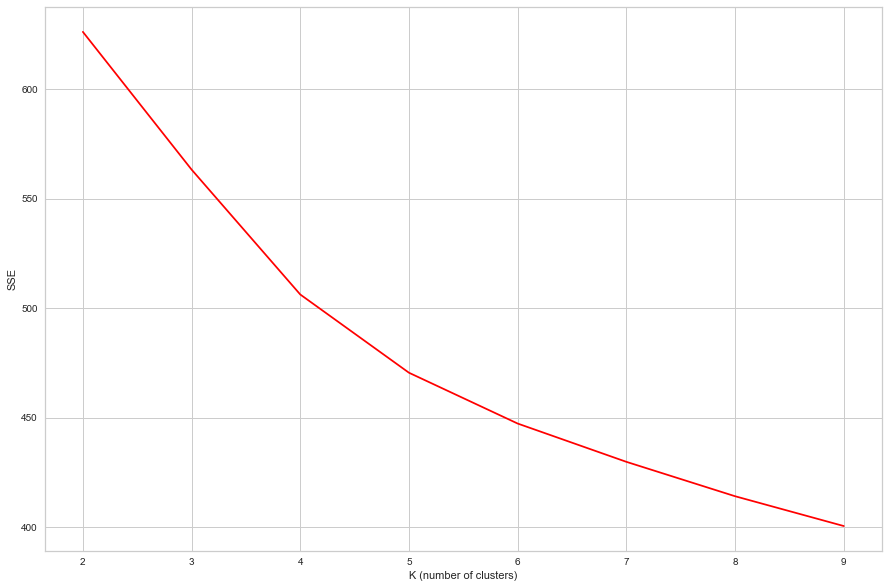

In [5]:
plt.figure(figsize=(15,10))
plt.plot(range(2,10), kmeansInertias, 'x-', color="red")
plt.ylabel('SSE')
plt.xlabel('K (number of clusters)')
plt.show()

## Elbow Method / SSE Plot vs Silhouette Analysis Plot

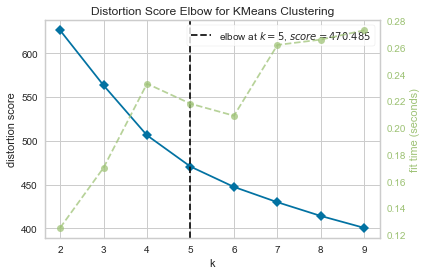

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
km = KMeans(init='k-means++', random_state=0, n_init=12)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df) # Fit the data to the visualizer
visualizer.show() 

## Finding optimal number of clusters

For n_clusters = 2 The average silhouette_score is : 0.17293889408252094
For n_clusters = 3 The average silhouette_score is : 0.18919336788073934
For n_clusters = 4 The average silhouette_score is : 0.16260382831257264
For n_clusters = 5 The average silhouette_score is : 0.1432060805098342
For n_clusters = 6 The average silhouette_score is : 0.14022435692920135
For n_clusters = 7 The average silhouette_score is : 0.13522765971495151
For n_clusters = 8 The average silhouette_score is : 0.12921087277380083
For n_clusters = 9 The average silhouette_score is : 0.1199221880802432


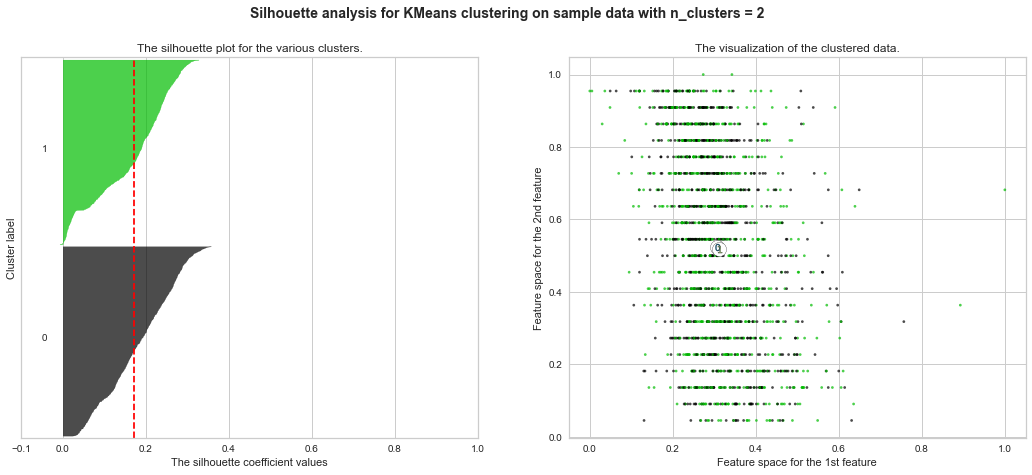

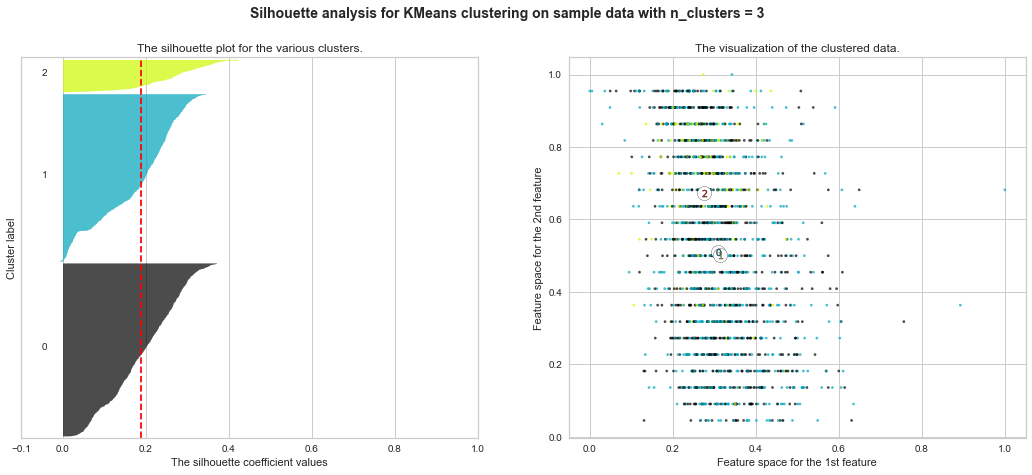

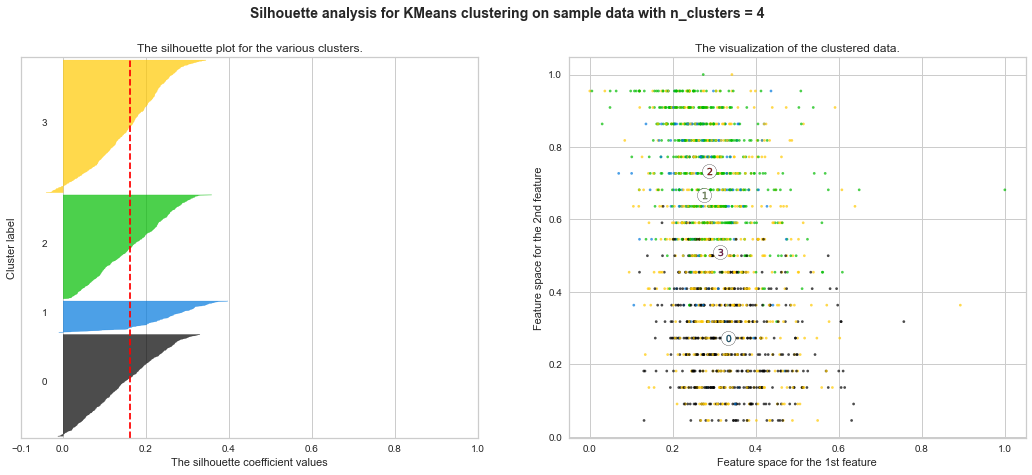

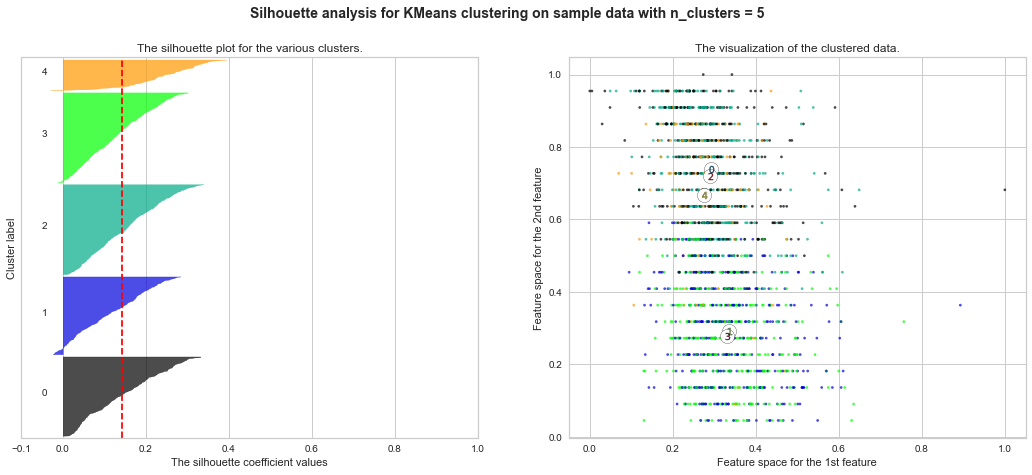

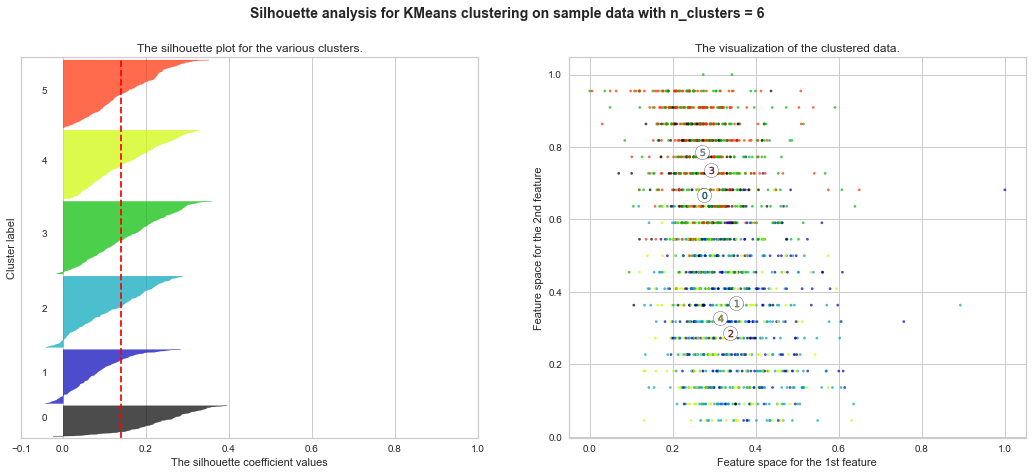

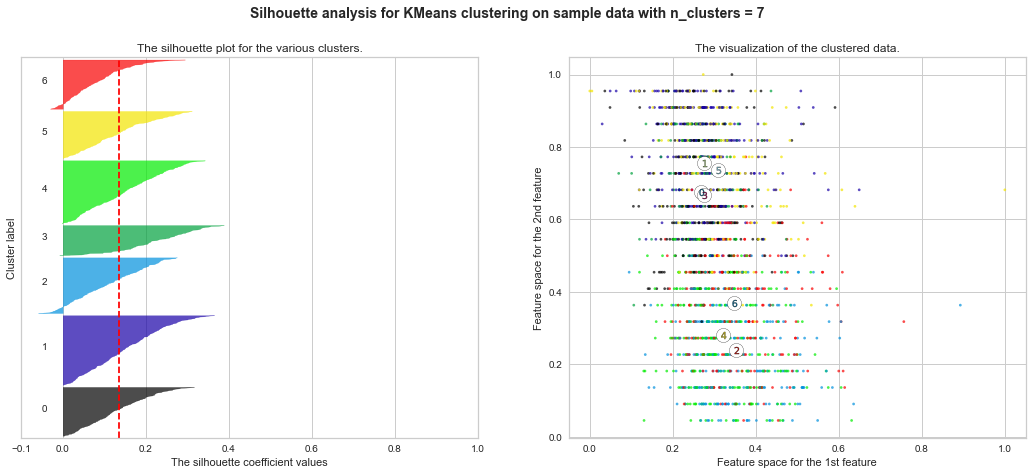

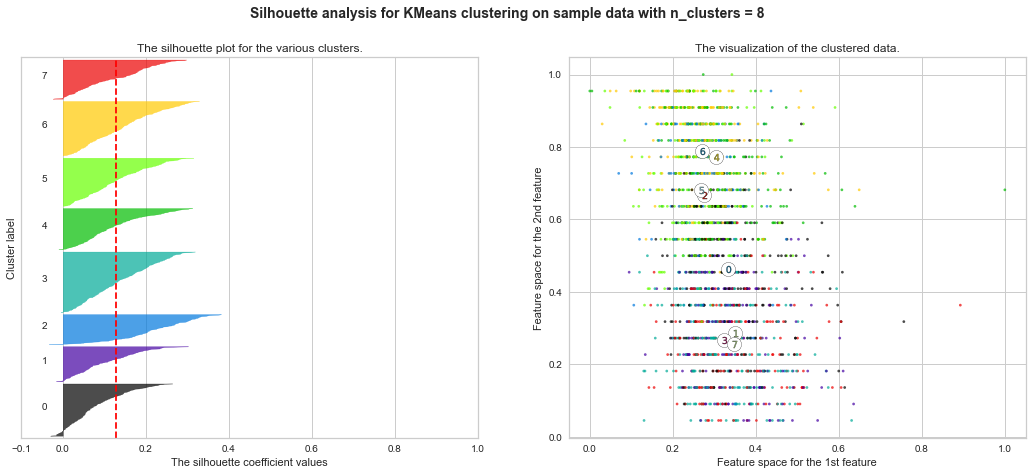

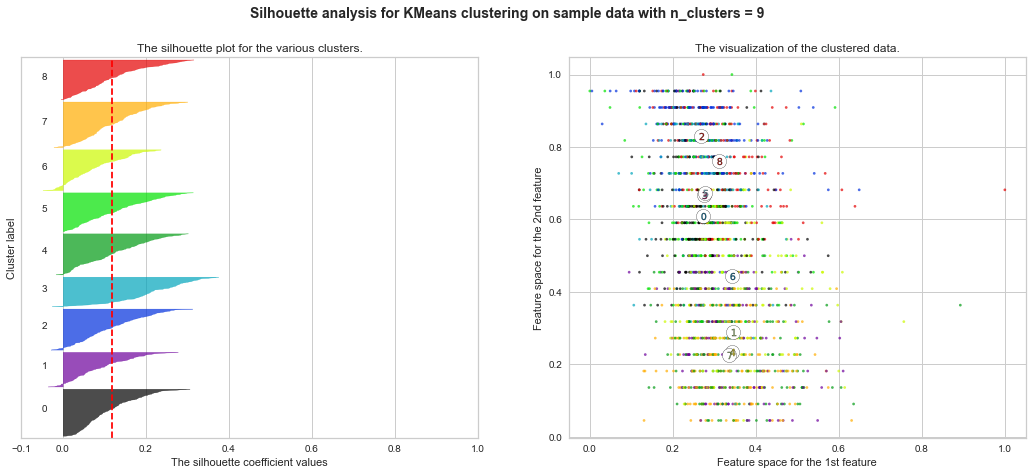

In [7]:
X = df.to_numpy()
silhouette_score_list = []

for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    silhouette_score_list.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Silhoutte plot

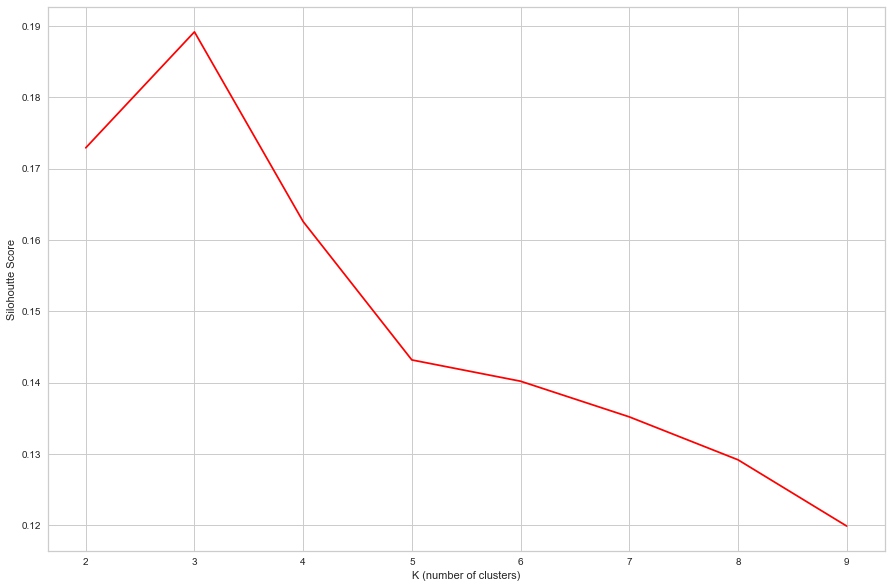

In [8]:
plt.figure(figsize=(15,10))
plt.plot(range(2,10), silhouette_score_list, 'x-', color="red")
plt.ylabel('Silohoutte Score')
plt.xlabel('K (number of clusters)')
plt.show()

# With PCA

## Implementing PCA

In [9]:
Newdf = df.copy()
#Load Data
pca = PCA(2)

#Transform the data
Newdf = pca.fit_transform(df)
data = Newdf.copy()
Newdf = pd.DataFrame(Newdf)

## Implement K-means

In [10]:
kmeansInertias = []
clusterCenters = []
for k in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0, n_init=12) 
    kmeans.fit(Newdf)
    clusterCenters = kmeans.cluster_centers_
    kmeansInertias.append(kmeans.inertia_)

## SSE

In [11]:
kmeansInertiasTable = pd.DataFrame(kmeansInertias, columns=['SSE'], index=list(range(2,10)))
kmeansInertiasTable = kmeansInertiasTable.transpose()
kmeansInertiasTable

,2,3,4,5,6,7,8,9
SSE,182.461882,122.612813,85.855285,70.125833,57.867783,48.719372,41.912616,35.964866


## Elbow Method

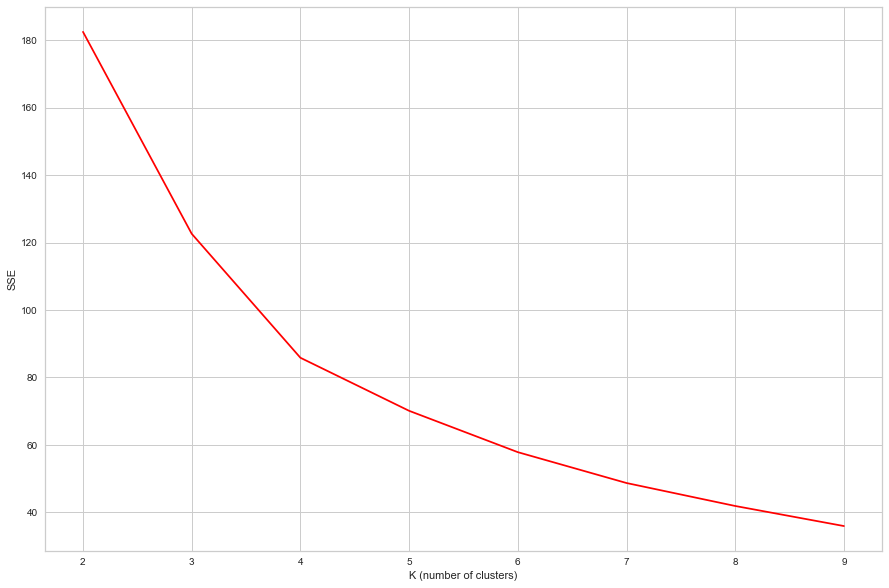

In [12]:
plt.figure(figsize=(15,10))
plt.plot(range(2,10), kmeansInertias, 'x-', color="red")
plt.ylabel('SSE')
plt.xlabel('K (number of clusters)')
plt.show()

## Finding optimal number of clusters with PCA

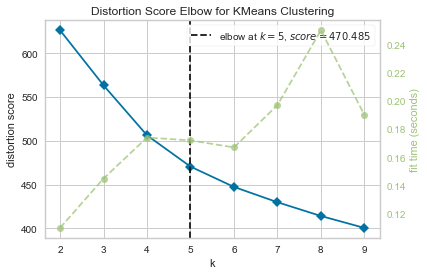

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
km = KMeans(init='k-means++', random_state=0, n_init=12)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df) # Fit the data to the visualizer
visualizer.show() 

For n_clusters = 2 The average silhouette_score is : 0.39477862638108757
For n_clusters = 3 The average silhouette_score is : 0.38957857369646937
For n_clusters = 4 The average silhouette_score is : 0.37982423466891346
For n_clusters = 5 The average silhouette_score is : 0.37942166313181086
For n_clusters = 6 The average silhouette_score is : 0.37085615872267746
For n_clusters = 7 The average silhouette_score is : 0.3879799740764042
For n_clusters = 8 The average silhouette_score is : 0.3747071269399504
For n_clusters = 9 The average silhouette_score is : 0.3719249497857146


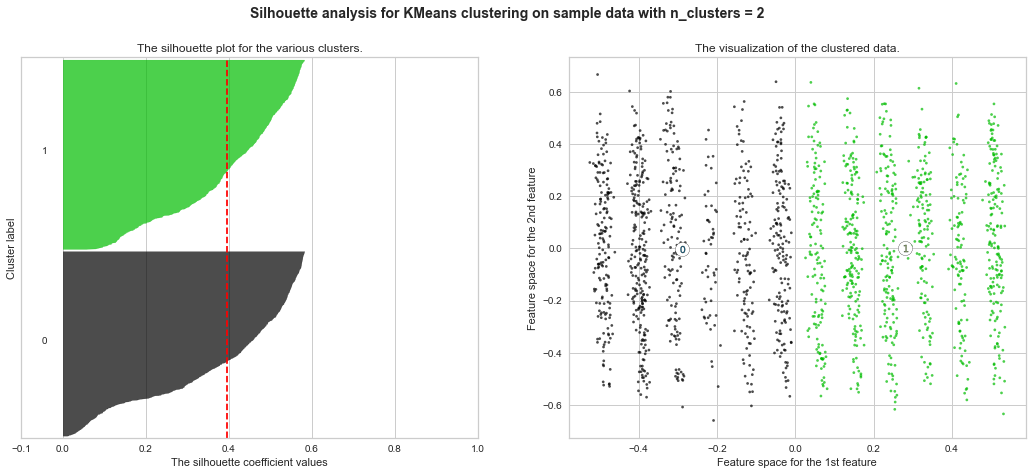

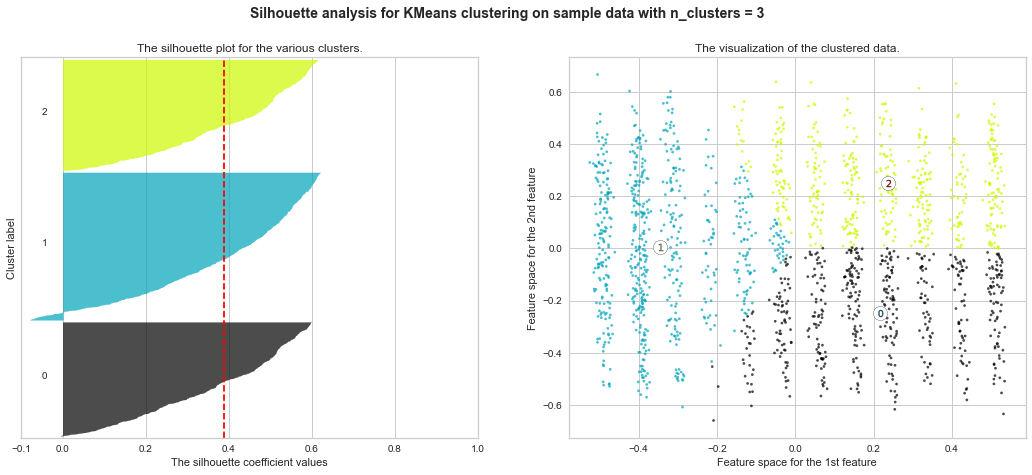

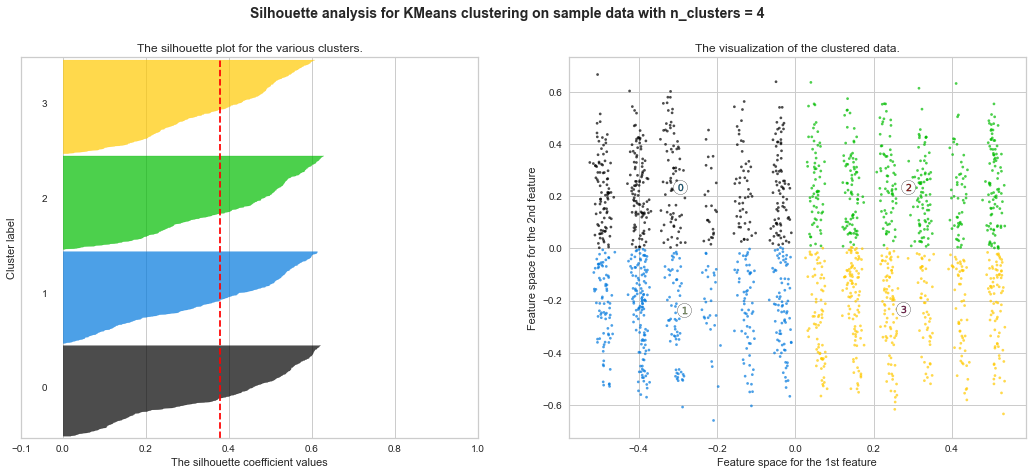

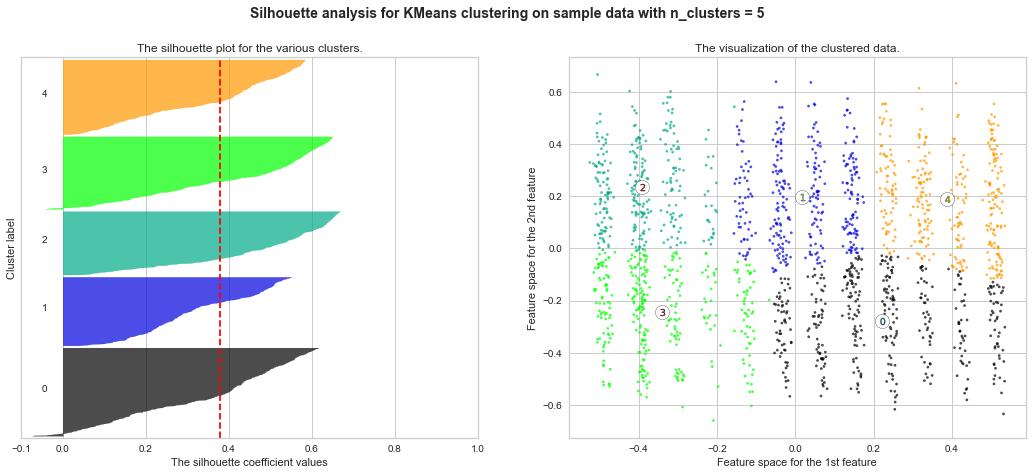

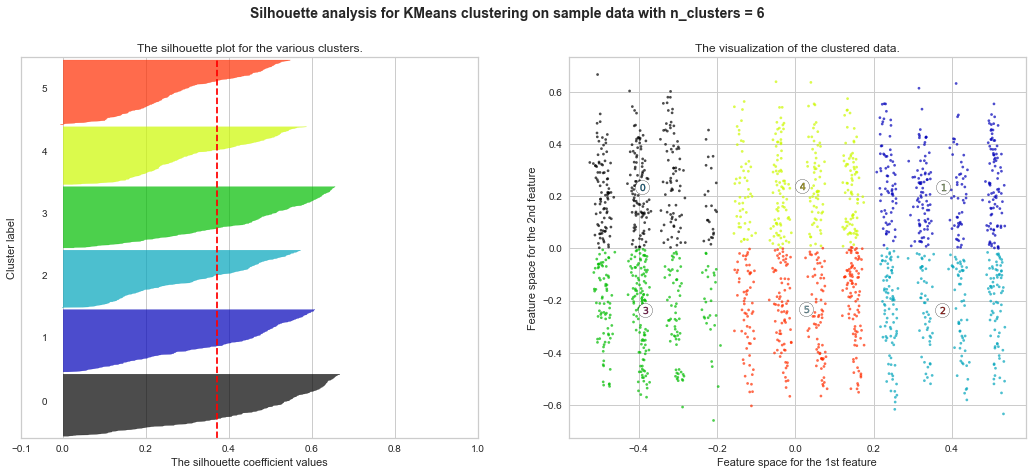

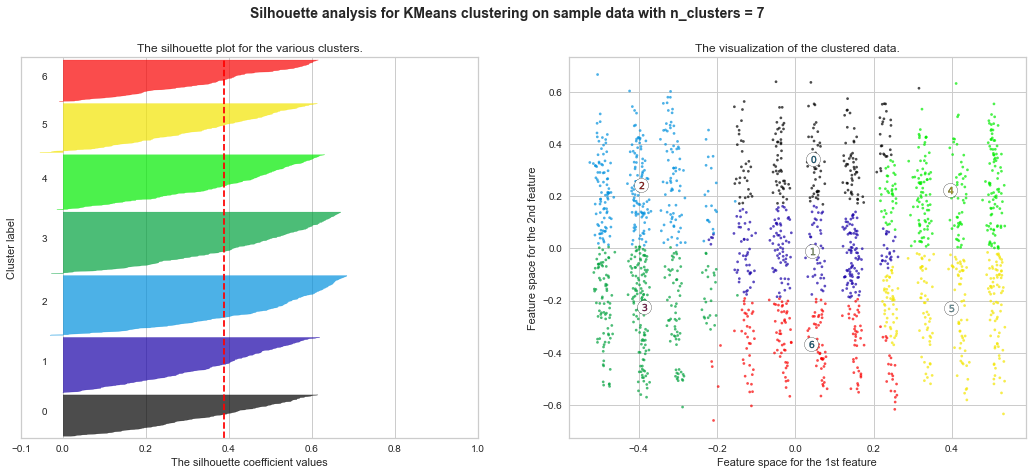

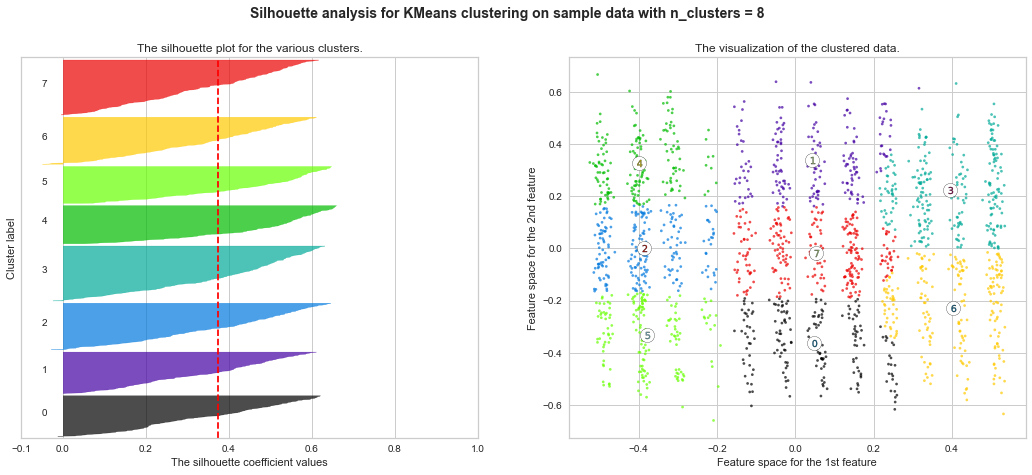

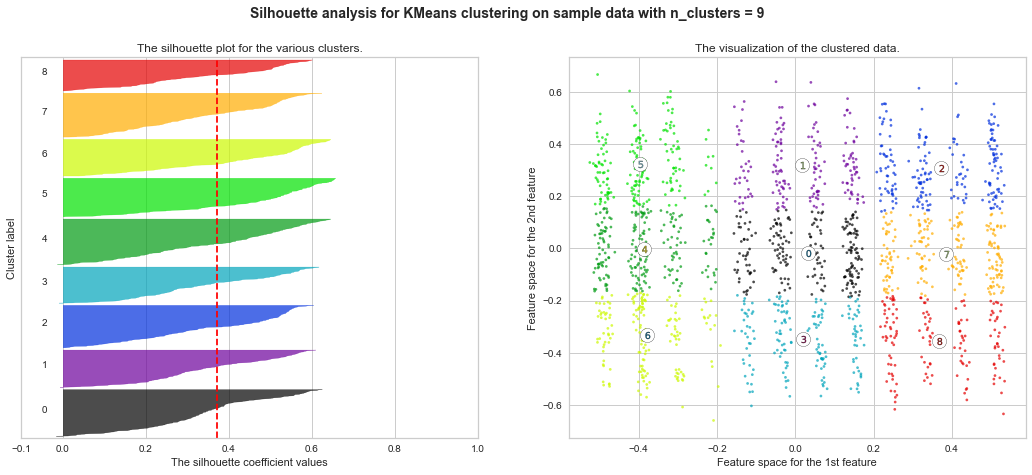

In [18]:
pca = PCA(2)
X = pca.fit_transform(df)

for n_clusters in range(2, 10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Silhoutte plot

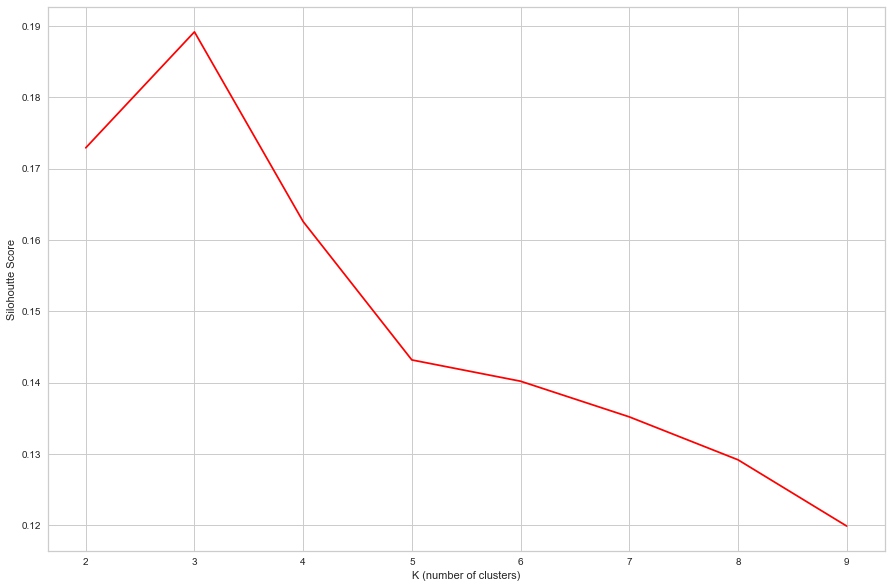

In [19]:
plt.figure(figsize=(15,10))
plt.plot(range(2,10), silhouette_score_list, 'x-', color="red")
plt.ylabel('Silohoutte Score')
plt.xlabel('K (number of clusters)')
plt.show()